In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import pydotplus
from IPython.display import Image

from sklearn import datasets
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
tennis_data = pd.read_csv(path+'playtennis.csv')

for col in tennis_data.columns:
    le = LabelEncoder()
    le.fit(tennis_data[col])
    tennis_data[col] = le.transform(tennis_data[col])
    
x = np.array(tennis_data.drop('PlayTennis', axis=1))
y = np.array(tennis_data['PlayTennis'])

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [3]:
dt_clf = DecisionTreeClassifier(max_depth=2)
dt_clf.fit(x_train, y_train)
pred = dt_clf.predict(x_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



In [4]:
feature_names = tennis_data.columns.tolist()[:4]
target_names = np.array(['PlayNo', 'PlayYes'])

dt_dot_data =tree.export_graphviz(dt_clf, out_file=None,
                                  feature_names=feature_names,
                                  class_names=target_names,
                                  filled=True, rounded=True,
                                  special_characters=True)

dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

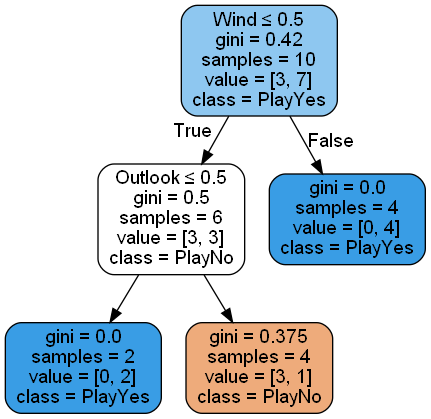

In [5]:
Image(dt_graph.create_png())

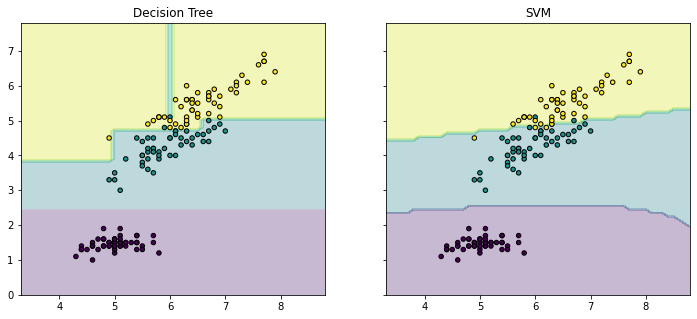

In [10]:
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

clf1 = DecisionTreeClassifier(max_depth=5)
clf3 = SVC(kernel='rbf')

clf1.fit(X, y)
clf3.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(12, 5))
for idx, clf, tt in zip([0, 1],
                        [clf1, clf3],
                        ['Decision Tree', 'SVM']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx].set_title(tt)

plt.show()